In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import wget

In [7]:
wget.download("https://drive.google.com/u/0/uc?id=1zqHZ314JGN8aAX0YWYrikINIlcYKTn7k&export=download")

'Churn_Modelling.csv'

In [9]:
df = pd.read_csv('Churn_Modelling.csv')

In [10]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [12]:
df.shape

(10000, 14)

In [13]:
np.unique(df['Exited'])

array([0, 1])

In [ ]:
#5. Handling Missing values

In [14]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
#4. Perform descriptive statistics on the dataset.

In [15]:
df.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [16]:

#3. Perform different Visualizations.

    # Univariate Analysis
    # Bi - Variate Analysis
    # Multi - Variate Analysis



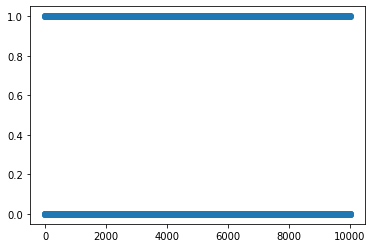

In [17]:
plt.scatter(df.index,df['Exited'])

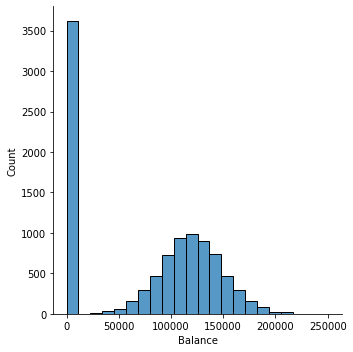

In [18]:
sns.displot(df['Balance'])

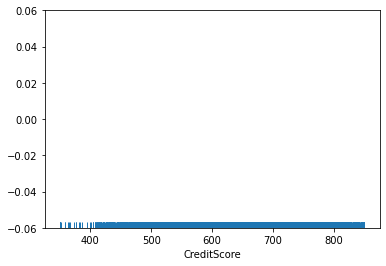

In [19]:
sns.rugplot(df['CreditScore'])

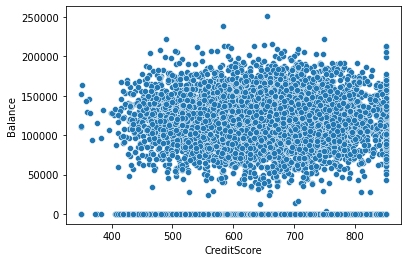

In [20]:
sns.scatterplot(x=df['CreditScore'], y=df['Balance'])

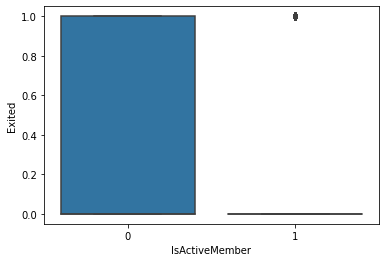

In [21]:
sns.boxplot(x='IsActiveMember', y='Exited', data=df)

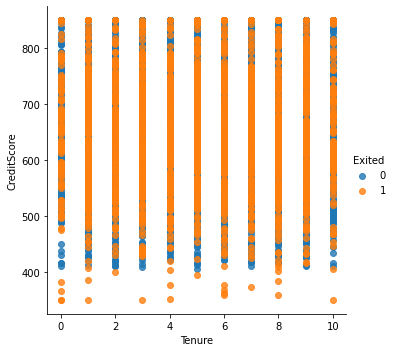

In [22]:
sns.lmplot(x='Tenure', y='CreditScore', data=df, hue="Exited", fit_reg=False);

In [ ]:
#7. Check for Categorical columns and perform encoding.

In [23]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [24]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [25]:
df['Geography']=preprocessing.LabelEncoder().fit_transform(df['Geography'])

In [26]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,0,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,0,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,0,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,1,Male,42,3,75075.31,2,1,0,92888.52,1


In [27]:
df['Gender']=df['Gender'].map({'Male':0,'Female':1})

In [28]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,0,0,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,0,0,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,0,1,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,1,0,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
#6. Find the outliers and replace the outliers

In [29]:
df.describe()['Balance']

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

In [30]:
def impute_outliers_IQR(df):
    qu1 = df.quantile(0.25)
    qu3 = df.quantile(0.75)
    iqr = qu3 - qu1

    upper = df[~(df > (qu3 + 1.5 * iqr))].max()
    lower = df[~(df < (qu1 - 1.5 * iqr))].min()

    df = np.where(
       df > upper, 
       df.mean(), 
       np.where(df < lower, df.mean(), df)
    )

    return df

In [31]:
df['Balance'] = impute_outliers_IQR(df['Balance'])

In [32]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,0,0,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,0,0,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,0,1,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,1,0,42,3,75075.31,2,1,0,92888.52,1


In [33]:
df.describe()['Balance']

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

In [34]:
df.describe()['EstimatedSalary']

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

In [35]:
df['EstimatedSalary'] = impute_outliers_IQR(df['EstimatedSalary'])

In [36]:
df.describe()['EstimatedSalary']

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

In [37]:
def find_outliers_IQR(df):
    qu1=df.quantile(0.25)
    qu3=df.quantile(0.75)
    iqr = qu3 - qu1

    outliers = df[((df < (qu1 - 1.5 * iqr)) | (df > (qu3 + 1.5 * iqr)))]
    return outliers

In [38]:
outliers = find_outliers_IQR(df['EstimatedSalary'])

In [39]:
print(outliers)

Series([], Name: EstimatedSalary, dtype: float64)


In [40]:
print(len(outliers))
print(outliers.max())
print(outliers.min())

0
nan
nan


In [41]:
outliers = find_outliers_IQR(df['Balance'])

In [42]:
print(len(outliers))
print(outliers.max())
print(outliers.min())

0
nan
nan


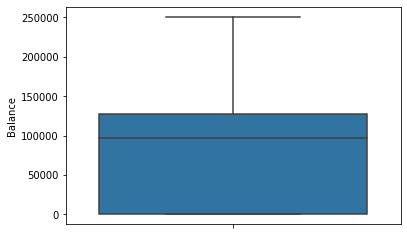

In [43]:
sns.boxplot(y=df['Balance'])

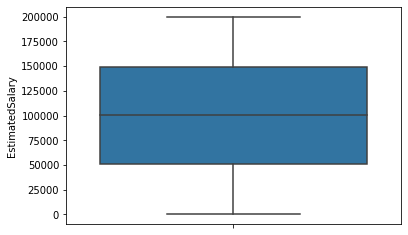

In [44]:
sns.boxplot(y=df['EstimatedSalary'])

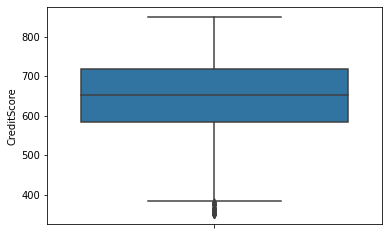

In [45]:
sns.boxplot(y=df['CreditScore'])

In [46]:
outliers = find_outliers_IQR(df['CreditScore'])

In [47]:
print(len(outliers))
print(outliers.max())
print(outliers.min())

15
382
350


In [48]:
df['CreditScore'] = impute_outliers_IQR(df['CreditScore'])

In [49]:
df.describe()['CreditScore']

count    10000.000000
mean       650.962593
std         96.000144
min        383.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

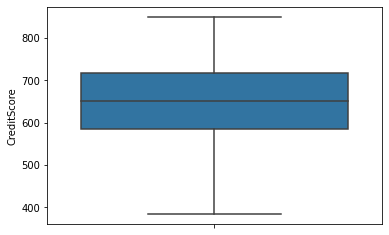

In [50]:
sns.boxplot(y=df['CreditScore'])

In [ ]:
#8. Split the data into dependent and independent variables

In [51]:
features=list(set(df)-set(['Exited']))

In [52]:
features

['IsActiveMember',
 'Age',
 'EstimatedSalary',
 'NumOfProducts',
 'Surname',
 'Tenure',
 'Balance',
 'Gender',
 'CustomerId',
 'CreditScore',
 'HasCrCard',
 'RowNumber',
 'Geography']

In [53]:
x=df[features].values

In [54]:
x

array([[1, 42, 101348.88, ..., 1, 1, 0],
       [1, 41, 112542.58, ..., 0, 2, 2],
       [0, 42, 113931.57, ..., 1, 3, 0],
       ...,
       [1, 36, 42085.58, ..., 0, 9998, 0],
       [0, 42, 92888.52, ..., 1, 9999, 1],
       [0, 28, 38190.78, ..., 1, 10000, 0]], dtype=object)

In [55]:
y=df['Exited'].values

In [56]:
y

array([1, 0, 1, ..., 1, 1, 0])

In [57]:
df[features]

,IsActiveMember,Age,EstimatedSalary,NumOfProducts,Surname,Tenure,Balance,Gender,CustomerId,CreditScore,HasCrCard,RowNumber,Geography
0,1,42,101348.88,1,Hargrave,2,0.00,1,15634602,619.0,1,1,0
1,1,41,112542.58,1,Hill,1,83807.86,1,15647311,608.0,0,2,2
2,0,42,113931.57,3,Onio,8,159660.80,1,15619304,502.0,1,3,0
3,0,39,93826.63,2,Boni,1,0.00,1,15701354,699.0,0,4,0
4,1,43,79084.10,1,Mitchell,2,125510.82,1,15737888,850.0,1,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,39,96270.64,2,Obijiaku,5,0.00,0,15606229,771.0,1,9996,0
9996,1,35,101699.77,1,Johnstone,10,57369.61,0,15569892,516.0,1,9997,0
9997,1,36,42085.58,1,Liu,7,0.00,1,15584532,709.0,0,9998,0
9998,0,42,92888.52,2,Sabbatini,3,75075.31,0,15682355,772.0,1,9999,1


In [ ]:
#9. Scale the independent variables

In [58]:
scale = StandardScaler()
x = scale.fit_transform(df[['EstimatedSalary','Balance','CreditScore']])
x

array([[ 0.02188649, -1.22584767, -0.33295983],
       [ 0.21653375,  0.11735002, -0.44754872],
       [ 0.2406869 ,  1.33305335, -1.55176894],
       ...,
       [-1.00864308, -1.22584767,  0.60458564],
       [-0.12523071, -0.02260751,  1.26086748],
       [-1.07636976,  0.85996499,  1.46921091]])

In [ ]:
#10. Split the data into training and testing

In [59]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=0)

In [60]:
train_x,test_x,train_y,test_y

(array([[ 1.10838187, -1.22584767,  0.16706442],
        [-0.74759209, -0.01289171, -2.33305684],
        [ 1.48746417,  0.57507592, -1.20800227],
        ...,
        [ 1.41441489,  1.35890908,  0.90668363],
        [ 0.84614739, -1.22584767, -0.63505781],
        [ 0.32630495,  0.50630343, -0.29129114]]),
 array([[ 1.61304597,  0.87532296, -0.56213761],
        [ 0.49753166,  0.42442221, -1.33300833],
        [-0.4235611 ,  0.30292727,  0.57333413],
        ...,
        [ 0.72065149,  1.29470288, -0.76006388],
        [-1.54438254,  1.0563022 , -0.0100275 ],
        [ 1.61474887,  0.81611017, -0.81214974]]),
 array([0, 0, 0, ..., 0, 0, 1]),
 array([0, 1, 0, ..., 0, 0, 0]))